Edge Detection using Sobel Operator
====================================================

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = "assassins-creed-origins-6l.jpg"
image = "20160409063519.jpg"
img = imread(image)

[nx,ny,c] = img.shape

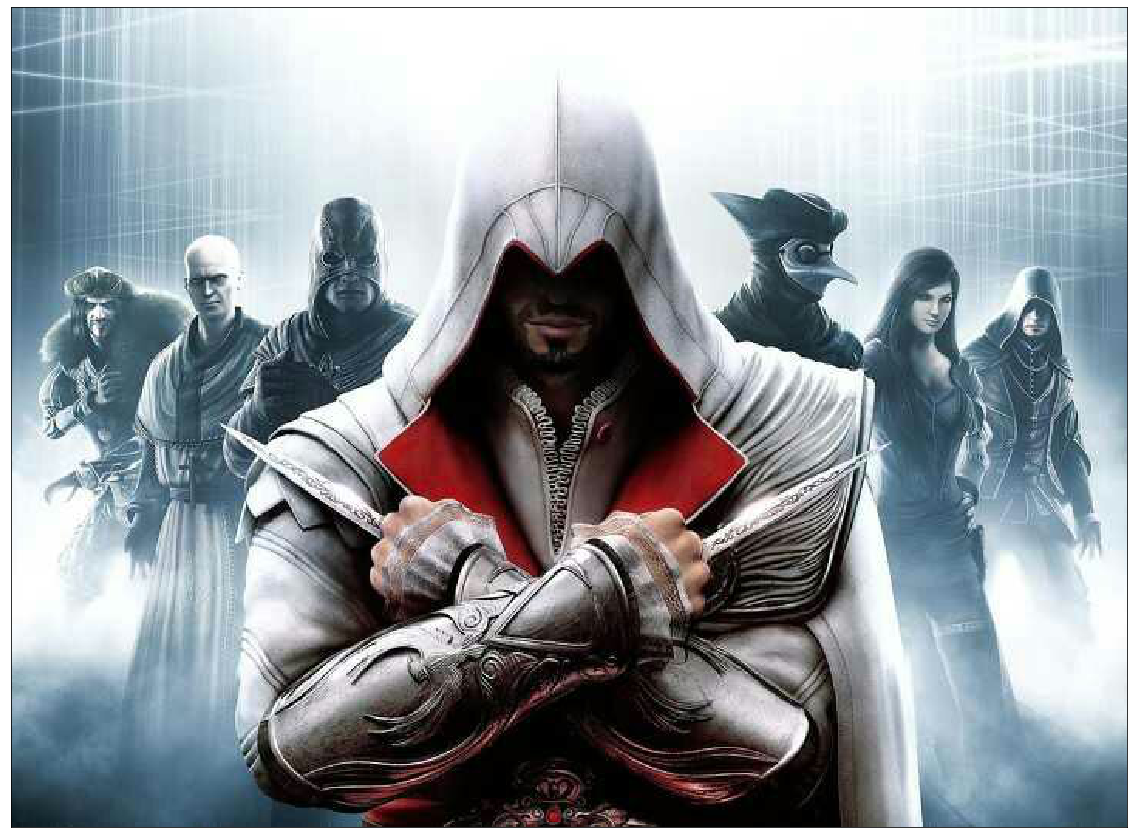

In [3]:
plt.figure(figsize = (20,20))
plt.xticks(())
plt.yticks(())
plt.imshow(img)

**Define the Sobel Filters**
1. $G_{x} = \begin{bmatrix} -1.0 & -2.0 & -1.0 \\ 0.0 & 0.0 & 0.0 \\1.0 & 2.0 & 1.0\end{bmatrix}$<br><br>
2. $G_{y} = \begin{bmatrix} -1.0 & 0.0 & 1.0 \\ -2.0 & 0.0 & 2.0 \\-1.0 & 0.0 & 1.0\end{bmatrix}$<br><br>
3. $G_{r} = \sqrt(G_{x}^{2} + G_{y}^{2})$

In [4]:
Gx = [[-1.0,-2.0,-1.0],
      [ 0.0, 0.0, 0.0],
      [ 1.0, 2.0, 1.0]] #Horizontal Filter

Gy = [[-1.0, 0.0, 1.0],
     [-2.0, 0.0, 2.0],
     [-1.0, 0.0, 1.0]] #vertical_filter


In [5]:
new_image = np.zeros_like(img)

**Applying gaussian Blurrer to reduce noisy edges**

In [6]:
def gaussian_filter(shape  = (101,101), sigma = 1):
    x,y = [edge//2 for edge in shape]
    grid = np.array([[((i**2 + j**2)/(2.0*sigma**2)) for i in range(-x,x+1)] for j in range(-y,y+1)])
    g_filter = np.exp(-grid)/(2*np.pi*sigma**2)
    g_filter /= np.sum(g_filter)
    return g_filter

In [7]:
gaussian_blurr = gaussian_filter()

In [8]:
for row in range(0, nx-100):
    for col in range(0, ny-100):
        local_pixels_0 = img[row:row+101, col:col+101,0]
        transformed_pixels_0 = gaussian_blurr*local_pixels_0
        score_0 = transformed_pixels_0.sum()
#         new_image[row,col] = [score_0]*3
        
        local_pixels_1 = img[row:row+101, col:col+101,1]
        transformed_pixels_1 = gaussian_blurr*local_pixels_1
        score_1 = transformed_pixels_1.sum()
        
        local_pixels_2 = img[row:row+101, col:col+101,2]
        transformed_pixels_2 = gaussian_blurr*local_pixels_2
        score_2 = transformed_pixels_2.sum()
        
        new_image[row,col] = [score_0,score_1,score_2]

In [9]:
import math
n_out_row = math.ceil(531-101)+1 #722*531 dimension of image
n_out_col = math.ceil(722-101)+1

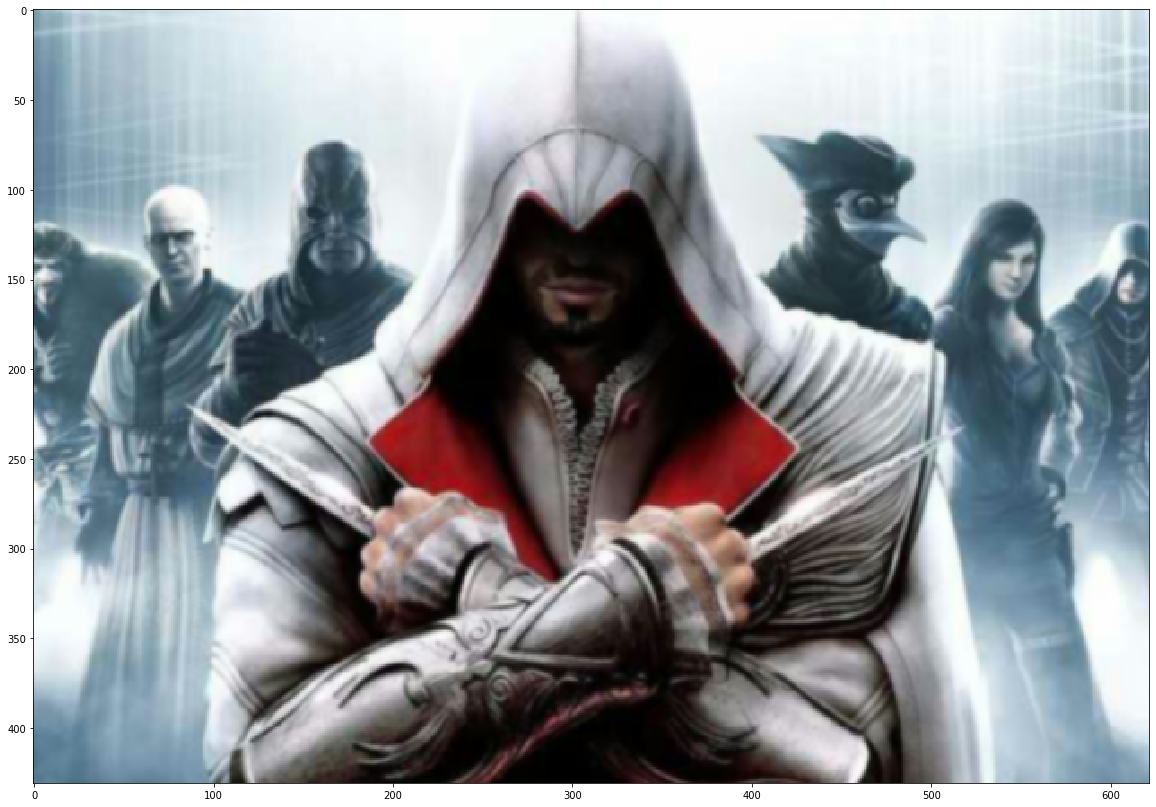

In [10]:
plt.figure(figsize = (20,20))
plt.imshow(new_image[:n_out_row,:n_out_col,:])

In [11]:
vertical_edges_img = np.zeros_like(img)
horizontal_edges_img = np.zeros_like(img)

**Horizontal edges**

In [12]:
for row in range(3, nx-2):
    for col in range(3, ny-2):
        local_pixels = new_image[row-1:row+2, col-1:col+2,0]
        transformed_pixels = Gx*local_pixels
        horizontal_score = (transformed_pixels.sum() + 4.0)/8.0
        horizontal_edges_img[row,col] = [horizontal_score]*3 

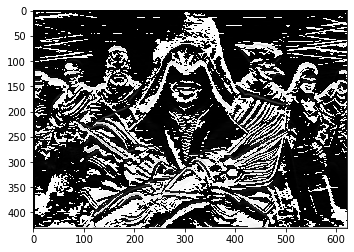

In [13]:
plt.imshow(horizontal_edges_img[:n_out_row,:n_out_col,:], cmap = plt.get_cmap('gray'))

**Vertical edges**

In [14]:
for row in range(3, nx-2):
    for col in range(3, ny-2):
        local_pixels = new_image[row-1:row+2, col-1:col+2,0]
        transformed_pixels = Gy*local_pixels
        vertical_score = (transformed_pixels.sum() + 4.0)/8.0
        vertical_edges_img[row,col] = [vertical_score]*3 

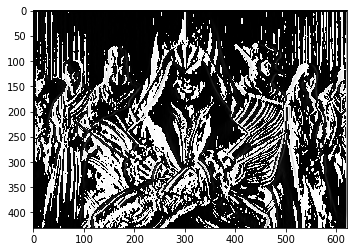

In [15]:
plt.imshow(vertical_edges_img[:n_out_row,:n_out_col,:], cmap = plt.get_cmap('gray'))

In [16]:
edges_img = np.zeros_like(img)

In [17]:
for row in range(3, nx-2):
    for col in range(3, ny-2):
        local_pixels = new_image[row-1:row+2,col-1:col+2,0]
        
        vertical_transformed_pixels = Gy*local_pixels
        vertical_score = (vertical_transformed_pixels.sum() + 4.0)/8.0
        
        horizontal_transformed_pixels = Gx*local_pixels
        horizontal_score = (horizontal_transformed_pixels.sum()+ 4.0)/8.0
        
        edge_score = (vertical_score**2 + horizontal_score**2)**0.5
        edges_img[row,col] = [edge_score]*3
        
edges_img = edges_img[:n_out_row,:n_out_col,:]

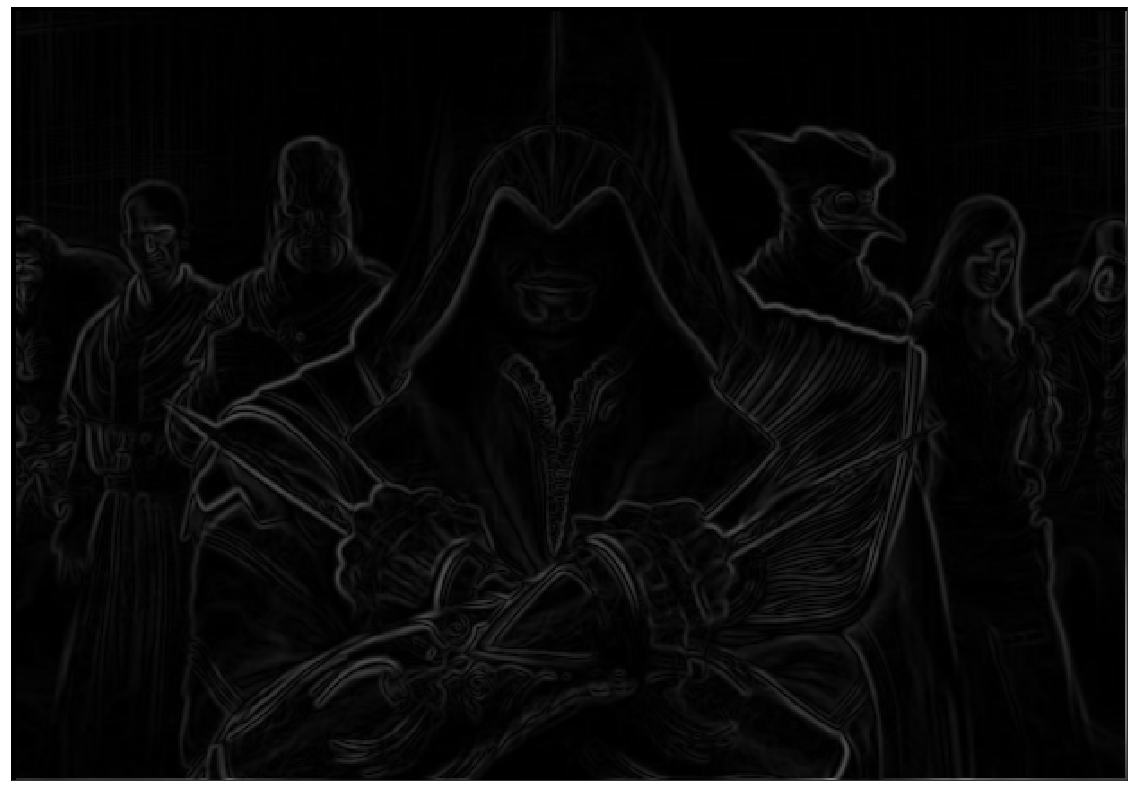

In [18]:
plt.figure(figsize = (20,20))
plt.xticks(())
plt.yticks(())
plt.imshow(edges_img)
plt.savefig('assassins_rev', dpi = 500, quality = 95)

# THE END